## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#### Step 1.5 − Aux Functions

In [58]:
def dividir_matriz_por_percentagem(matriz, percentagem, seed):
    # Define a seed para a aleatoriedade ser reprodutível
    random.seed(seed)
    
    # Calcula quantas linhas terão na matriz menor
    n_linhas_menor_matriz = int(len(matriz) * percentagem)
    
    # Seleciona aleatoriamente as linhas para a matriz menor
    linhas_selecionadas = random.sample(range(len(matriz)), n_linhas_menor_matriz)
    
    # Cria as matrizes maior e menor
    matriz_menor = [matriz[i] for i in linhas_selecionadas]
    matriz_maior = [matriz[i] for i in range(len(matriz)) if i not in linhas_selecionadas]
    
    return matriz_maior, matriz_menor


#### Step 2 − Load the dataset

In [59]:
# import data:
X_train_full = np.load('X_train.npy')
y_train_full = np.load('y_train.npy')
X_test = np.load('X_test.npy')

X_train, X_val = dividir_matriz_por_percentagem(X_train_full, 0.2, 1234)
print(len(X_train))
y_train, y_val = dividir_matriz_por_percentagem(y_train_full, 0.2, 1234)
print(len(y_train))


160
160


#### Step 3 − Plot the trainning features and outputs

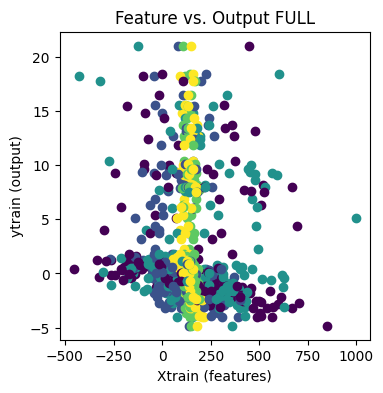

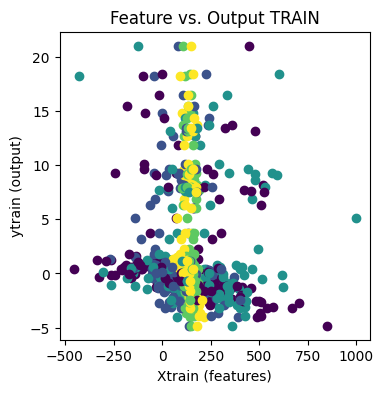

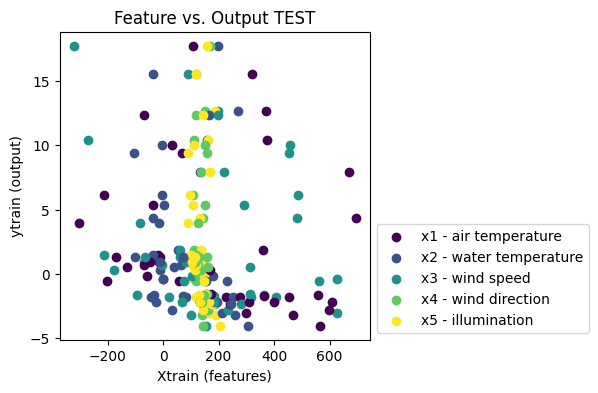

In [60]:
# plot data:

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output FULL')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train_full):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_full[s], color= colors[f])

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output TRAIN')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output TEST')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_val):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_val[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 4 - Outlier Removal



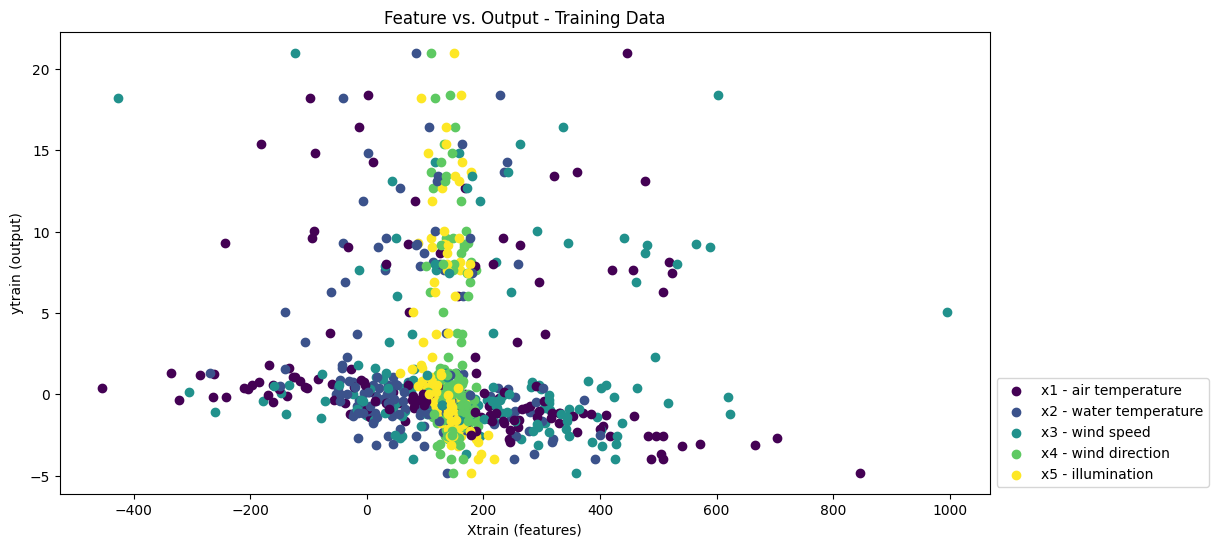

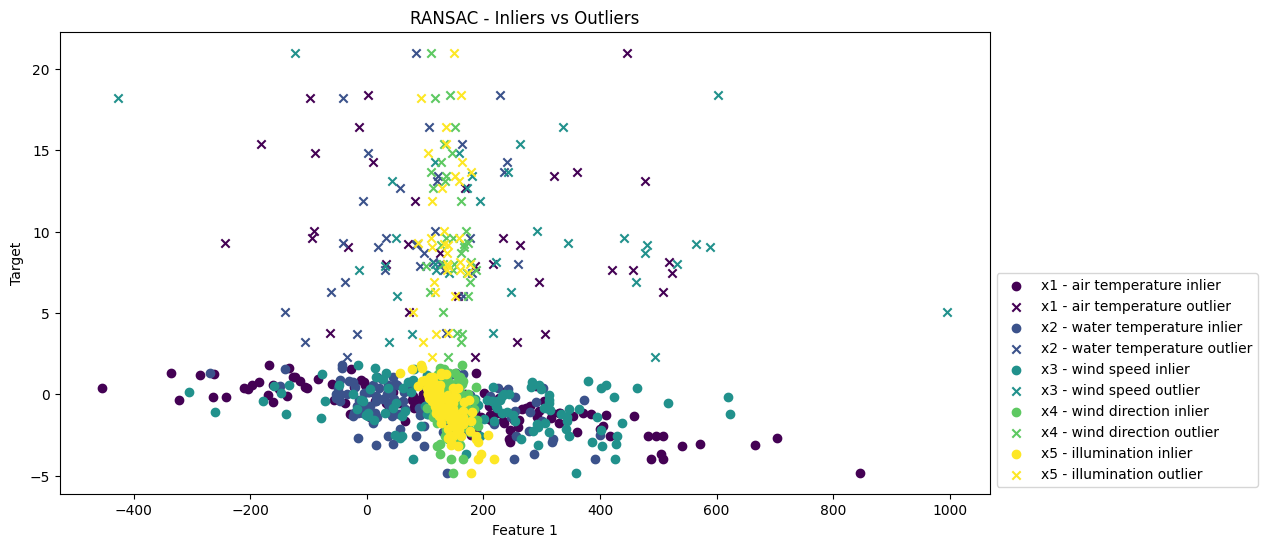

In [69]:
X_train = np.array(X_train)
y_train = np.array(y_train)


#Ransac Model
ransac = RANSACRegressor(estimator=LinearRegression())

#ransac to our data
ransac.fit(X_train, y_train)
inlier_mask = ransac.inlier_mask_

y_pred_ransac = ransac.predict(X_val)

X_train_clean= X_train[inlier_mask]
y_train_clean = y_train[inlier_mask]


num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

# Plot the results
plt.figure(figsize=(12, 6))
plt.title('Feature vs. Output - Training Data')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')

labels = []

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

plt.figure(figsize=(12,6))

plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('RANSAC - Inliers vs Outliers')

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
labels_outliers = []

# Plot inliers and outliers
for f, feature in enumerate(X_train.T):  # Transpose to iterate features
    plt.scatter(feature[inlier_mask], y_train[inlier_mask], color=colors[f], marker='o')
    plt.scatter(feature[outlier_mask], y_train[outlier_mask], color=colors[f], marker='x')

labels_outliers.append('x1 - air temperature inlier')
labels_outliers.append('x1 - air temperature outlier')
labels_outliers.append('x2 - water temperature inlier')
labels_outliers.append('x2 - water temperature outlier')
labels_outliers.append('x3 - wind speed inlier')
labels_outliers.append('x3 - wind speed outlier')
labels_outliers.append('x4 - wind direction inlier')
labels_outliers.append('x4 - wind direction outlier')
labels_outliers.append('x5 - illumination inlier')
labels_outliers.append('x5 - illumination outlier')


#plt.scatter(X_train[inlier_mask][:, 0], y_train[inlier_mask], color= colors[f], marker='o', label='Inliers')
#plt.scatter(X_train[outlier_mask][:, 0], y_train[outlier_mask], color='red', marker='x', label='Outliers')


plt.legend(labels_outliers[:10], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#Linear Regression

#model = LinearRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_val)



#plt.figure(figsize=(12,6))
#plt.title('Feature vs. Output - Linear Regression')
#plt.xlabel('Xtrain (features)')
#plt.ylabel('ypred (output)')


#for s,sample in enumerate(X_val):
#    for f, feature in enumerate(sample):
#        plt.scatter(feature, y_pred[s], color= colors[f])



#plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
#plt.show()

#RANSAC 

#plt.figure(figsize=(12,6))
#plt.title('Feature vs. Output - RANSAC')
#plt.xlabel('Xtrain (features)')
#plt.ylabel('ypred_RANSAC (output)')

#for s,sample in enumerate(X_val):
#    for f, feature in enumerate(sample):
#        plt.scatter(feature, y_pred_ransac[s], color= colors[f])

#plt.plot(X_train, y_pred, color='blue', label='Linear Regression')
#plt.plot(X_train, y_pred_ransac, color='green', label='RANSAC')

#plt.xlabel('Feature')
#plt.ylabel('Target')
#plt.title('Comparison of Linear Regression and RANSAC on Training Data')
#plt.legend()
#plt.show()







#### Step 5 − Scaling


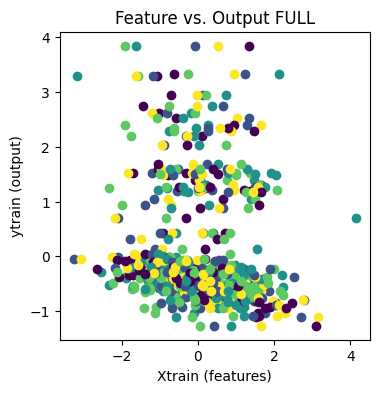

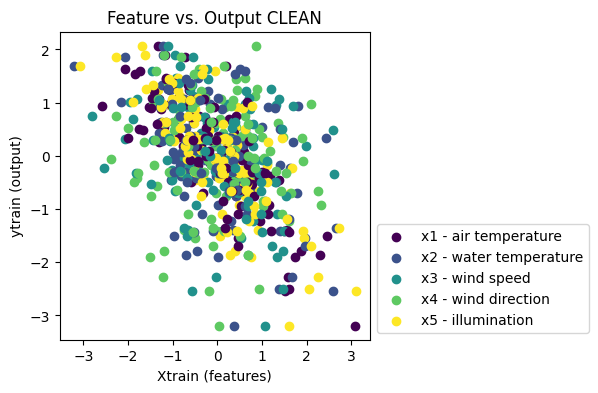

In [63]:
# normalize data:

#def Scaler(data, inverse=False):
    
#    u = np.mean(data)
#    s = np.std(data)

#    scaled_data = (data - u) / s

    # useful to scale back the model's output
#    if inverse:

#        scaled_data = data * s + u 

#    return scaled_data


#Xtrain_scaled = Scaler(Xtrain)
#ytrain_scaled = Scaler(ytrain)
#Xtest_scaled = Scaler(Xtest)

y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1,1)


scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.fit_transform(y_val)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output FULL')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train_scaled):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_scaled[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

y_train_clean = np.array(y_train_clean).reshape(-1, 1)



X_val_scaled = scaler.fit_transform(X_val)  
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

y_train_clean_scaled = scaler.fit_transform(y_train_clean)
y_val_scaled = scaler.fit_transform(y_val)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output CLEAN')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train_clean_scaled):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_clean_scaled[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 6 − Linear Regression 


In [34]:
# models:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_val_scaled)

y_pred = scaler.inverse_transform(y_pred_scaled)

sse_linear_reg= np.sum((y_pred - y_val)**2)

print(sse_linear_reg)

#difference bettween real and predicted values
#residuals = y_train - y_pred

#plt.scatter(y_pred, residuals)
#plt.hlines(0, min(y_pred), max(y_pred), colors='r')
#plt.xlabel('Predicted Value')
#plt.ylabel('Residuals')
#plt.title('Residuals vs Predicted Value')
#plt.show()




1234.1652611639672


#### Step 6 − Regularization


In [71]:
# models:
#ridge = Ridge(alpha=0.1)

ridge_params = {'alpha': [0.01, 0.1, 1.0, 10, 100, 1000]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train_scaled)
print(f"Best Ridge alpha: {ridge_cv.best_params_}")
#Lasso = Lasso(alpha=1)


y_pred_ridge_scaled= ridge_cv.predict(X_val_scaled)
#print(y_pred_ridge_scaled)

y_pred_ridge = scaler.inverse_transform(y_pred_ridge_scaled)

sse_linear_ridge= np.sum((y_pred_ridge - y_val)**2)

print(sse_linear_ridge)



# For Lasso
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10, 100, 1000]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train_scaled)

print(f"Best Lasso alpha: {lasso_cv.best_params_}")

y_pred_lasso_scaled= lasso_cv.predict(X_val_scaled)
y_pred_lasso_scaled = y_pred_lasso_scaled.reshape(-1, 1)

y_pred_lasso = scaler.inverse_transform(y_pred_lasso_scaled)

sse_linear_lasso= np.sum((y_pred_lasso - y_val)**2)

print(sse_linear_lasso)

#mse_ridge = mean_squared_error(y_pred_ridge, y_val)
#sse_ridge = mse_ridge * len(y_val)  # Multiply MSE by number of samples to get SSE
#print(f"Ridge SSE (from MSE): {sse_ridge}")





Best Ridge alpha: {'alpha': 100}
1176.6011675445084
Best Lasso alpha: {'alpha': 1.0}
1225.9993138677978


(6, 5)
(6, 5)


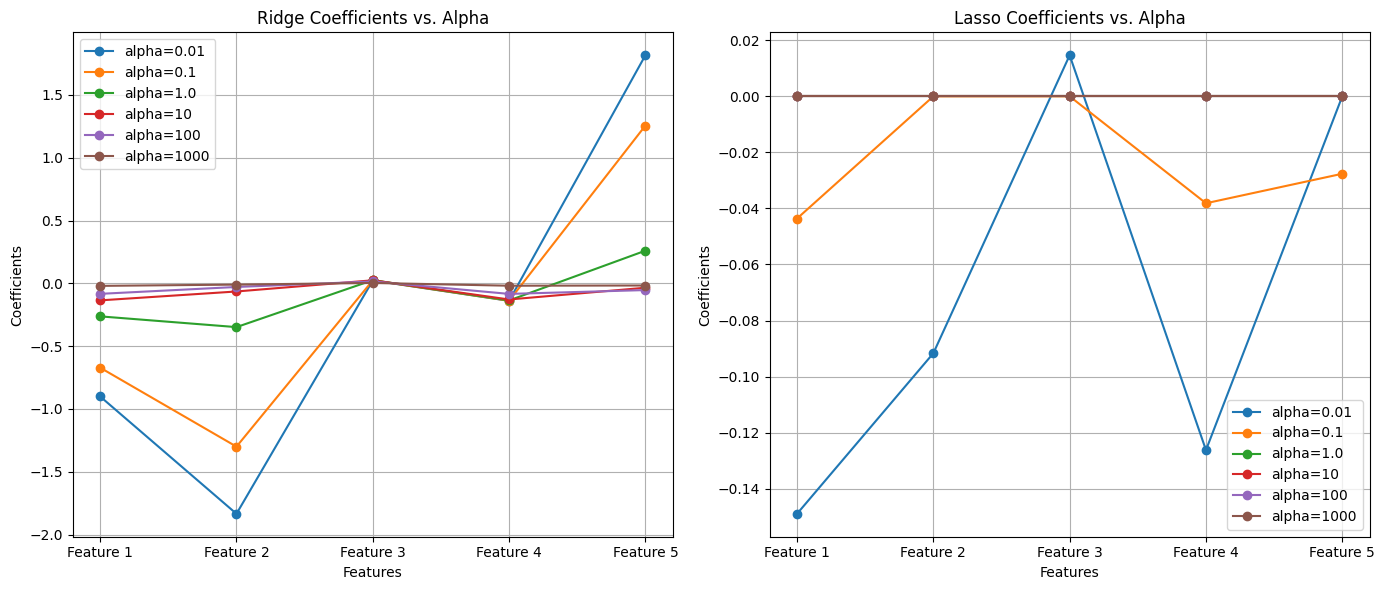

In [80]:
# Example data: replace with actual feature names
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
alphas = [0.01, 0.1, 1.0, 10, 100, 1000]

# Initialize lists to store coefficients
coeffs_ridge = []
coeffs_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_scaled)
    coeffs_ridge.append(ridge.coef_.flatten())

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train_scaled)
    coeffs_lasso.append(lasso.coef_)

# Convert to numpy arrays for easier plotting
coeffs_ridge = np.array(coeffs_ridge)
coeffs_lasso = np.array(coeffs_lasso)


plt.figure(figsize=(14, 6))

# Plot Ridge coefficients
plt.subplot(1, 2, 1)
for i, alpha in enumerate(alphas):
    plt.plot(feature_names, coeffs_ridge[i], marker='o', label=f'alpha={alpha}')
plt.title('Ridge Coefficients vs. Alpha')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()
plt.grid(True)

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
for i, alpha in enumerate(alphas):
    plt.plot(feature_names, coeffs_lasso[i], marker='o', label=f'alpha={alpha}')
plt.title('Lasso Coefficients vs. Alpha')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Step 6 − Train the best model using the fit() method

In [19]:
# create the best model (with alpha = best alpha):
best_Ridge = Ridge(alpha=100)
# train the best model with the trainning data:
best_Ridge.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.1306532663316583)

#### Step 7 − Predict the output for the testing data

In [20]:


y_pred_ridge_scaled= best_Ridge.predict(X_val_scaled)
#print(y_pred_ridge_scaled)

y_pred_ridge = scaler.inverse_transform(y_pred_ridge_scaled)

(200, 1)

In [232]:
# save ypred_test as .txt file:
np.save('ytest_pred', y_pred_ridge)